# Weather Data Analysis and Prediction using Spark


In [204]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### start a spark session

In [205]:
# import some modules to be used in py-spark SQL
from pyspark import SparkConf
from pyspark.sql import SparkSession

# Initialize Saprk Session
spark=SparkSession.builder.appName("PySpark_Testing").getOrCreate()
sc = spark.sparkContext


In [206]:

from pyspark.sql import *
from pyspark.sql.types import *
from pandas.api.types import *

In [207]:
sparkdata=spark.read.csv("/home/saniya/Documents/BIG DATA/J COMPONENT/delhi-weather-data/testset.csv")

In [208]:
sparkdata.head()

Row(_c0='datetime_utc', _c1='conds', _c2='dewptm', _c3='fog', _c4='hail', _c5=' _heatindexm', _c6='hum', _c7=' precipm', _c8='pressurem', _c9='rain', _c10=' snow', _c11='tempm', _c12='thunder', _c13='tornado', _c14='vism', _c15='wdird', _c16='wdire', _c17='wgustm', _c18='windchillm', _c19='wspdm')

### Read the dataset

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("/home/saniya/Documents/BIG DATA/J COMPONENT/delhi-weather-data/testset.csv")


In [211]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,_heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [212]:
data.describe()

,dewptm,fog,hail,_heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [213]:
data.count()

datetime_utc    100990
conds           100918
dewptm          100369
fog             100990
hail            100990
 _heatindexm     29155
hum             100233
 precipm             0
pressurem       100758
rain            100990
 snow           100990
tempm           100317
thunder         100990
tornado         100990
vism             96562
wdird            86235
wdire            86235
wgustm            1072
windchillm         579
wspdm            98632
dtype: int64

### Plot the attributes

<Figure size 1440x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

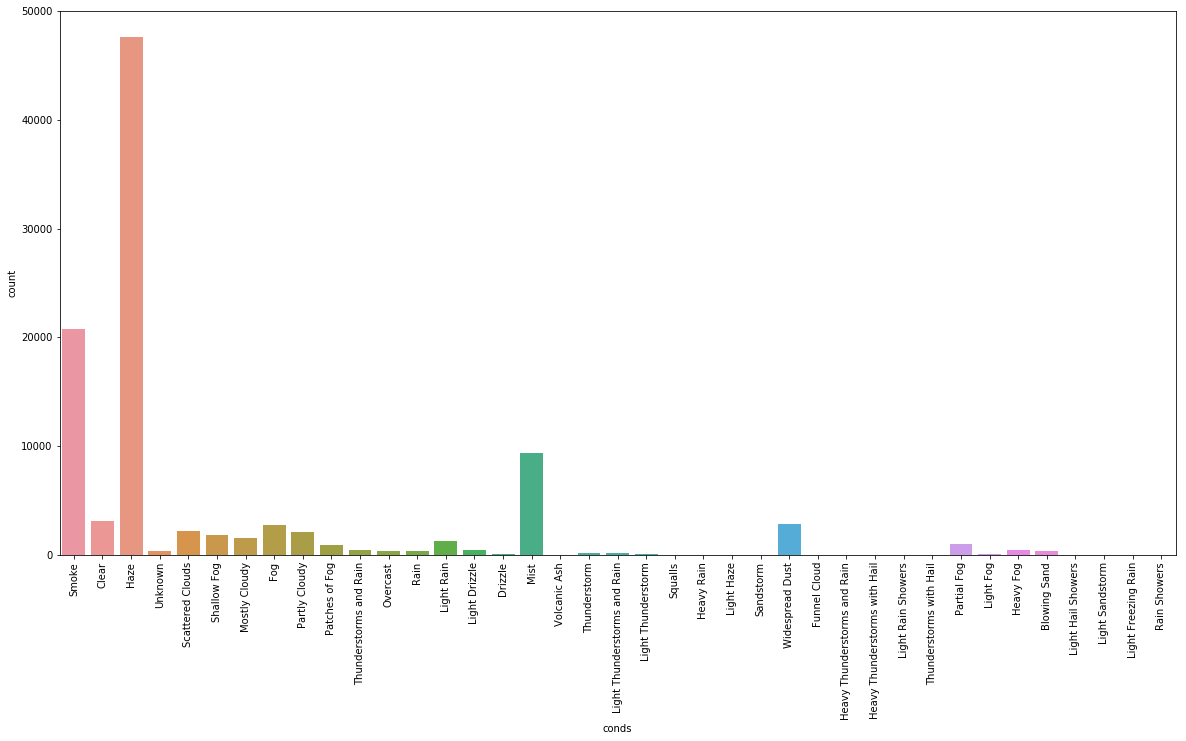

In [298]:
plt.figure(figsize=(20, 10))
sns.countplot(data.conds)
plt.xticks(rotation=90)

<Figure size 1440x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

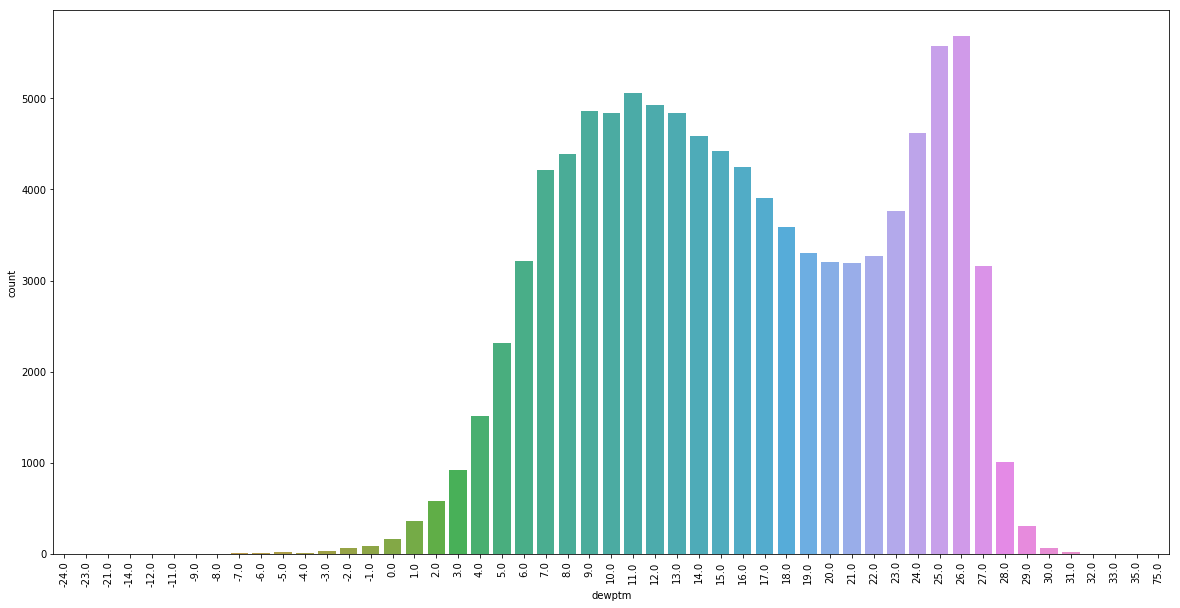

In [215]:
plt.figure(figsize=(20, 10))
sns.countplot(data.dewptm)
plt.xticks(rotation=90)

<Figure size 1440x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

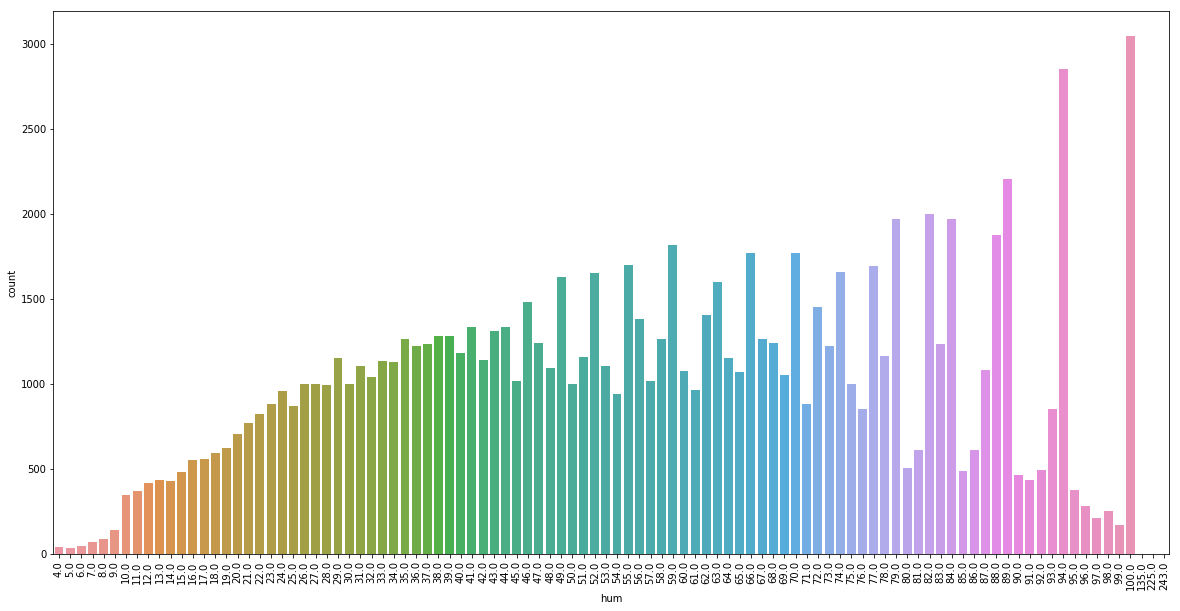

In [301]:
plt.figure(figsize=(20, 10))
sns.countplot(data.hum)
plt.xticks(rotation=90)


<Figure size 1440x720 with 0 Axes>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138]),
 <a list of 139 Text xticklabel objects>)

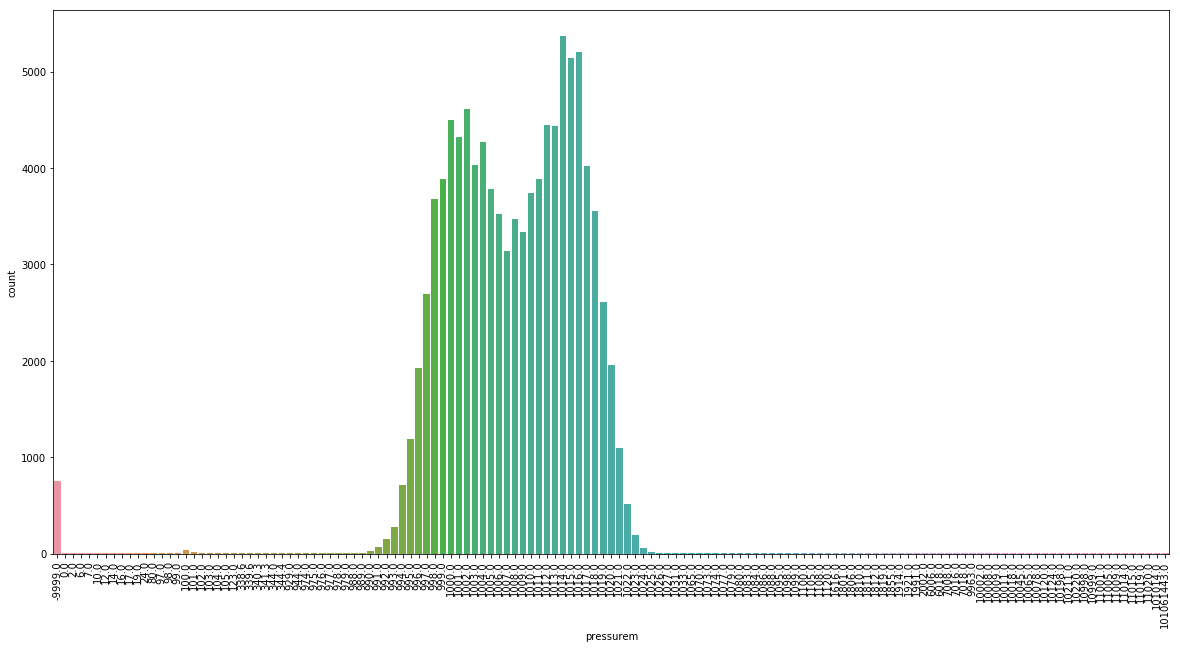

In [217]:
plt.figure(figsize=(20, 10))
sns.countplot(data.pressurem)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

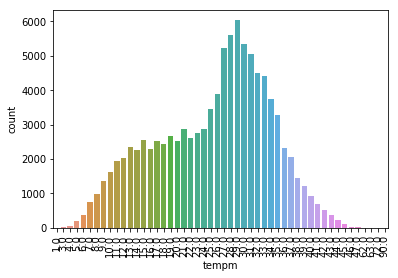

In [164]:
sns.countplot(data.tempm)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

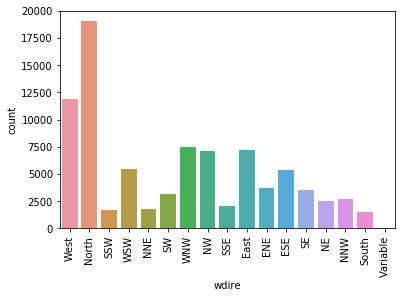

In [165]:
sns.countplot(data.wdire)
plt.xticks(rotation=90)

<Figure size 1440x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

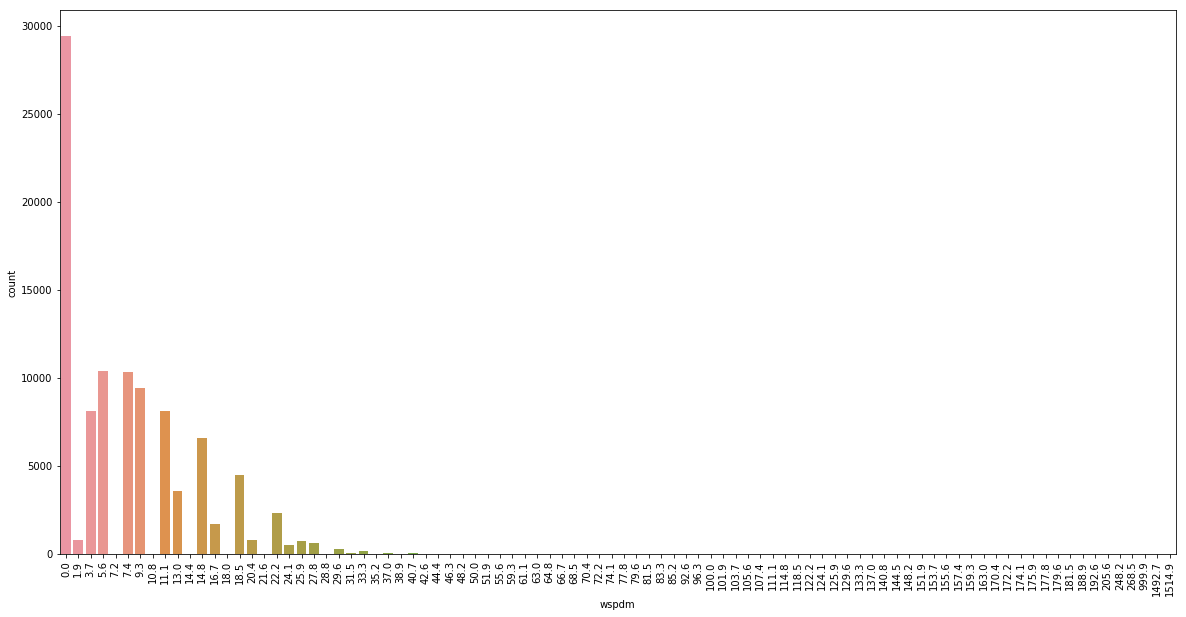

In [218]:
plt.figure(figsize=(20, 10))
sns.countplot(data.wspdm)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

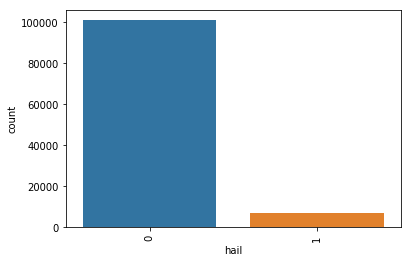

In [167]:
sns.countplot(data.fog)
plt.xticks(rotation=90)

sns.countplot(data.hail)
plt.xticks(rotation=90)

### Drop the unwanted columns 

In [168]:
cols=[3,4,5,7,8,9,10,12,13,14,15,16,17,18,19]
data.drop(data.columns[cols],axis=1,inplace=True)
#extracting weather conditions from 2010-2016
data1=data[76655:99570]
#Removing NAN values
data=data1.dropna(axis=0,how="any")


In [169]:
data.head()

,datetime_utc,conds,dewptm,hum,tempm
76655,20100101-00:00,Partial Fog,8.0,93.0,8.0
76656,20100101-03:00,Partial Fog,8.0,95.0,9.0
76657,20100101-06:00,Smoke,11.0,55.0,18.0
76658,20100101-09:00,Smoke,11.0,43.0,21.0
76659,20100101-12:00,Smoke,12.0,54.0,19.0


### Convert pandas to pyspark

In [170]:
myStruct=StructType([StructField("datetime_utc",StringType(),True)                    
                     ,StructField("conds",StringType(),True)                    
                     ,StructField("dewptm",DoubleType(),True)                    
                     ,StructField("hum",DoubleType(),True)                    
                     ,StructField("tempm",DoubleType(),True)])
#converting panda to pyspark
df=spark.createDataFrame(data,schema=myStruct)

In [171]:
df

DataFrame[datetime_utc: string, conds: string, dewptm: double, hum: double, tempm: double]

In [172]:
#storing in rdd
rdd=df.rdd.map(tuple)
rdd.collect()

[('20100101-00:00', 'Partial Fog', 8.0, 93.0, 8.0),
 ('20100101-03:00', 'Partial Fog', 8.0, 95.0, 9.0),
 ('20100101-06:00', 'Smoke', 11.0, 55.0, 18.0),
 ('20100101-09:00', 'Smoke', 11.0, 43.0, 21.0),
 ('20100101-12:00', 'Smoke', 12.0, 54.0, 19.0),
 ('20100101-15:00', 'Mist', 13.0, 95.0, 13.0),
 ('20100101-18:00', 'Patches of Fog', 10.0, 92.0, 11.0),
 ('20100101-21:00', 'Light Fog', 10.0, 98.0, 10.0),
 ('20100102-00:00', 'Heavy Fog', 9.0, 96.0, 9.0),
 ('20100102-03:00', 'Heavy Fog', 10.0, 98.0, 10.0),
 ('20100102-06:00', 'Heavy Fog', 10.0, 90.0, 11.0),
 ('20100102-09:00', 'Partial Fog', 11.0, 75.0, 14.0),
 ('20100102-12:00', 'Heavy Fog', 12.0, 89.0, 13.0),
 ('20100102-15:00', 'Heavy Fog', 10.0, 95.0, 10.0),
 ('20100102-18:00', 'Heavy Fog', 11.0, 95.0, 11.0),
 ('20100102-21:00', 'Heavy Fog', 11.0, 97.0, 11.0),
 ('20100103-00:00', 'Heavy Fog', 11.0, 95.0, 11.0),
 ('20100103-03:00', 'Partial Fog', 10.0, 87.0, 11.0),
 ('20100103-06:00', 'Heavy Fog', 11.0, 76.0, 14.0),
 ('20100103-09:00', 'L

### Find correlation between attributes

In [173]:
#correlation between temperature and dewptm
tempVector=rdd.map(lambda x:x[4])
dewVector=rdd.map(lambda x:x[2])
from pyspark.mllib.stat import Statistics 
correlation = Statistics.corr(tempVector, dewVector)
print(correlation)

0.6081116012324582


### <font color='red'> The highest correlation is between temperature and dew point </font>

In [174]:
#correlation between temperature and humidity
tempVector=rdd.map(lambda x:x[4])
humVector=rdd.map(lambda x:x[3])
from pyspark.mllib.stat import Statistics 
correlation = Statistics.corr(tempVector, humVector)
print(correlation)


-0.6306061983042924


In [175]:
#correlation between dewptm and humidity
dewVector=rdd.map(lambda x:x[2])
humVector=rdd.map(lambda x:x[3])
from pyspark.mllib.stat import Statistics 
correlation = Statistics.corr(dewVector, humVector)
print(correlation)


0.1793529321926014


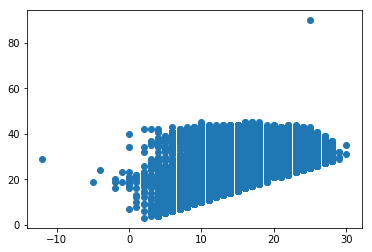

In [303]:
#Scatter plot between temperature and dewpoint
import matplotlib.pylab as plt
data1=df.toPandas()
mydata=data1[["dewptm","tempm"]]
vals = mydata.values
plt.scatter(vals[:,0],vals[:,1])

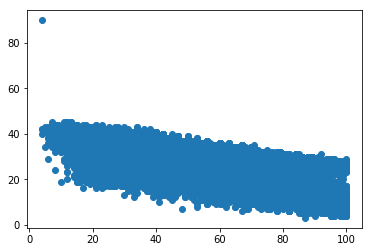

In [177]:
#Scatter plot between humidity and temperature
import matplotlib.pylab as plt
data1=df.toPandas()
mydata=data1[["hum","tempm"]]
vals = mydata.values
plt.scatter(vals[:,0],vals[:,1])

In [304]:
#mean temperature during Smoke condition
from pyspark.sql import functions as F
from pyspark.sql.functions import *
temp1=df.select(df['conds'],df['tempm'])
temp2=temp1.filter(temp1.conds == "Smoke")
rdd1=temp2.rdd.map(tuple)
rdd1.collect()
meanRDD=(rdd1
         .mapValues(lambda x: (x,1))
         .reduceByKey(lambda x,y:(x[0]+y[0],x[1]+y[1]))
         .mapValues(lambda x:x[0]/x[1]))
meanRDD.collect()

[('Smoke', 18.0),
 ('Smoke', 21.0),
 ('Smoke', 19.0),
 ('Smoke', 17.0),
 ('Smoke', 16.0),
 ('Smoke', 18.0),
 ('Smoke', 18.0),
 ('Smoke', 18.0),
 ('Smoke', 14.0),
 ('Smoke', 12.0),
 ('Smoke', 15.0),
 ('Smoke', 13.0),
 ('Smoke', 16.0),
 ('Smoke', 15.0),
 ('Smoke', 16.0),
 ('Smoke', 15.0),
 ('Smoke', 16.0),
 ('Smoke', 16.0),
 ('Smoke', 16.0),
 ('Smoke', 20.0),
 ('Smoke', 18.0),
 ('Smoke', 13.0),
 ('Smoke', 19.0),
 ('Smoke', 16.0),
 ('Smoke', 20.0),
 ('Smoke', 17.0),
 ('Smoke', 18.0),
 ('Smoke', 16.0),
 ('Smoke', 20.0),
 ('Smoke', 17.0),
 ('Smoke', 18.0),
 ('Smoke', 17.0),
 ('Smoke', 18.0),
 ('Smoke', 21.0),
 ('Smoke', 19.0),
 ('Smoke', 23.0),
 ('Smoke', 21.0),
 ('Smoke', 20.0),
 ('Smoke', 24.0),
 ('Smoke', 22.0),
 ('Smoke', 23.0),
 ('Smoke', 20.0),
 ('Smoke', 19.0),
 ('Smoke', 24.0),
 ('Smoke', 22.0),
 ('Smoke', 24.0),
 ('Smoke', 22.0),
 ('Smoke', 22.0),
 ('Smoke', 20.0),
 ('Smoke', 15.0),
 ('Smoke', 13.0),
 ('Smoke', 19.0),
 ('Smoke', 22.0),
 ('Smoke', 23.0),
 ('Smoke', 21.0),
 ('Smoke',

[('Smoke', 23.35547087642896)]

In [305]:
#maximum dew point during Fog
temp1=df.select(df['conds'],df['dewptm'])
temp2=temp1.filter(temp1.conds == "Fog")
temp3=temp2.select(temp2['dewptm'])
rdd1=temp3.rdd.map(tuple)
rdd1.max()

(26.0,)

In [306]:
#minimum humidity during Fog
rdd1.min()

(5.0,)

In [181]:
#Splitting date and time column
data1['date'],data1['time']=data1['datetime_utc'].str.split('-',1).str
data1.head()

,datetime_utc,conds,dewptm,hum,tempm,date,time
0,20100101-00:00,Partial Fog,8.0,93.0,8.0,20100101,00:00
1,20100101-03:00,Partial Fog,8.0,95.0,9.0,20100101,03:00
2,20100101-06:00,Smoke,11.0,55.0,18.0,20100101,06:00
3,20100101-09:00,Smoke,11.0,43.0,21.0,20100101,09:00
4,20100101-12:00,Smoke,12.0,54.0,19.0,20100101,12:00


In [182]:
#Splitting date and time column

cols=[0,1,6]
data1.drop(data1.columns[cols],axis=1,inplace=True)
data1['date']=pd.to_numeric(data1.date,errors='coerce')
data1.head()

,dewptm,hum,tempm,date
0,8.0,93.0,8.0,20100101
1,8.0,95.0,9.0,20100101
2,11.0,55.0,18.0,20100101
3,11.0,43.0,21.0,20100101
4,12.0,54.0,19.0,20100101


In [148]:
mySchema=StructType([StructField("dewptm",DoubleType(),True)                    
                     ,StructField("hum",DoubleType(),True)                    
                     ,StructField("tempm",DoubleType(),True)                    
                     ,StructField("Date",IntegerType(),True)])
#converting panda to pyspark
dff1=spark.createDataFrame(data1,schema=mySchema)
dff1.show()


+------+----+-----+--------+
|dewptm| hum|tempm|    Date|
+------+----+-----+--------+
|   8.0|93.0|  8.0|20100101|
|   8.0|95.0|  9.0|20100101|
|  11.0|55.0| 18.0|20100101|
|  11.0|43.0| 21.0|20100101|
|  12.0|54.0| 19.0|20100101|
|  13.0|95.0| 13.0|20100101|
|  10.0|92.0| 11.0|20100101|
|  10.0|98.0| 10.0|20100101|
|   9.0|96.0|  9.0|20100102|
|  10.0|98.0| 10.0|20100102|
|  10.0|90.0| 11.0|20100102|
|  11.0|75.0| 14.0|20100102|
|  12.0|89.0| 13.0|20100102|
|  10.0|95.0| 10.0|20100102|
|  11.0|95.0| 11.0|20100102|
|  11.0|97.0| 11.0|20100102|
|  11.0|95.0| 11.0|20100103|
|  10.0|87.0| 11.0|20100103|
|  11.0|76.0| 14.0|20100103|
|  13.0|87.0| 14.0|20100103|
+------+----+-----+--------+
only showing top 20 rows



In [185]:
#grouping by date
temp=dff1.groupby("date").agg(F.mean('hum'),F.mean('tempm'),F.mean('dewptm'))
temp.orderBy('date').show()


+--------+--------+------------------+-----------------+
|    date|avg(hum)|        avg(tempm)|      avg(dewptm)|
+--------+--------+------------------+-----------------+
|20100101|  78.125|            13.625|           10.375|
|20100102|  91.875|            11.125|             10.5|
|20100103|   90.25|              12.0|             11.0|
|20100104|    86.0|             11.25|            9.625|
|20100105|   84.25|            12.125|            9.625|
|20100106|  85.125|            11.375|            9.625|
|20100107|   86.25|            12.125|             10.5|
|20100108|   89.75|            10.875|            9.625|
|20100109|  78.125|              12.0|             8.75|
|20100110|   81.25|               9.5|              7.0|
|20100111|   75.25|              9.25|            6.125|
|20100112|  74.875|            10.625|            7.375|
|20100113|   79.25|            11.625|              9.0|
|20100114|   80.25|            11.875|             9.25|
|20100115|  78.375|            

In [186]:
#taking input from user
x=20171007
x1=x-10000
x2=x-20000
x3=x-30000
x4=x-40000
x5=x-50000
x6=x-60000
x7=x-70000


In [187]:
#extracting data for particular dates
data2=temp.toPandas()
data3=data2[(data2.date==x1) | (data2.date==x2) | (data2.date==x3) | (data2.date==x4) | (data2.date==x5)| (data2.date==x6)| (data2.date==x7)]
dats=spark.createDataFrame(data3)
dats.show()

+--------+-----------------+------------------+-----------+
|    date|         avg(hum)|        avg(tempm)|avg(dewptm)|
+--------+-----------------+------------------+-----------+
|20141007|           59.375|              31.0|       23.5|
|20101007|             72.0|            27.875|     23.375|
|20161007|            59.96|             30.96|      22.24|
|20111007|           61.625|            27.875|     20.875|
|20131007|66.57142857142857|29.714285714285715|       24.0|
|20151007|            65.75|            28.625|       23.0|
|20121007|            49.75|            26.875|     17.125|
+--------+-----------------+------------------+-----------+



### predicted weather condition for the particular date

In [25]:
temp1=dats.agg(F.mean('avg(hum)'),F.mean('avg(tempm)'),F.mean('avg(dewptm)'))
temp1.show()


+-----------------+------------------+-----------------+
|    avg(avg(hum))|   avg(avg(tempm))| avg(avg(dewptm))|
+-----------------+------------------+-----------------+
|66.17045454545455|22.154452690166977|16.09786641929499|
+-----------------+------------------+-----------------+



## Predict temperature using linear regression

In [219]:
data1.head()

,dewptm,hum,tempm,date
0,8.0,93.0,8.0,20100101
1,8.0,95.0,9.0,20100101
2,11.0,55.0,18.0,20100101
3,11.0,43.0,21.0,20100101
4,12.0,54.0,19.0,20100101


In [220]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [225]:
X=data1['dewptm']

In [226]:
Y=data1['tempm']

In [228]:
data1.describe()

,dewptm,hum,tempm,date
count,22800.000000,22800.000000,22800.000000,2.280000e+04
mean,17.562105,59.716579,25.739430,2.013614e+07
std,6.392405,23.976582,8.339986,2.152738e+04
min,-12.000000,4.000000,3.000000,2.010010e+07
25%,12.000000,40.000000,20.000000,2.012013e+07
50%,17.000000,61.000000,27.000000,2.014052e+07
75%,24.000000,80.000000,32.000000,2.016031e+07
max,30.000000,100.000000,90.000000,2.016123e+07


In [256]:
x1=data1['dewptm'].values.reshape(22800, -1)
y1=data1['tempm'].values.reshape(22800, -1)

In [257]:
X_train, X_test, Y_train, Y_test= train_test_split(x1, y1, test_size= 0.4, random_state=201)
lr = LinearRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [295]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b = numer / denom
a = mean_y - (b * mean_x)

# Print coefficients
print(a, b)

11.8059082654532 0.7933856078370172


Text(0.5, 0, 'dewptm')

Text(0, 0.5, 'temp')

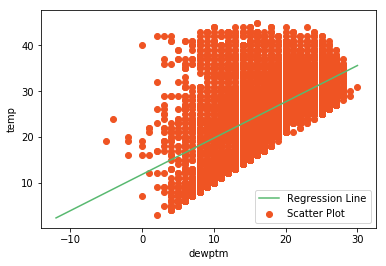

In [296]:
# Plotting Values and Regression Line

max_x = np.max(X) 
min_x = np.min(X) 

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = a + b * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X_test,Y_test, c='#ef5423', label='Scatter Plot')

plt.xlabel('dewptm')
plt.ylabel('temp')
plt.legend()
plt.show()

In [288]:
print("Value of dewptm" " vs "'Predicted value of temperature') #value of x and predicted y value
for i in range(8):
    print(X_test[i],' ',predictions[i])

Value of dewptm vs Predicted value of temperature
[22.]   [29.310243]
[19.]   [26.88689072]
[22.]   [29.310243]
[13.]   [22.04018618]
[23.]   [30.11802709]
[25.]   [31.73359527]
[7.]   [17.19348163]
[10.]   [19.61683391]


In [289]:
#Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))

Root Mean Squared Error: 6.605071470766598
Mean Absolute Error: 5.280080188855909
Mean Squared Error: 43.62696913393483


### Actual value of temperature vs Predicted value of temperature

In [290]:
#Actual value of temperature vs predicted value of temperature: 
print('Actual value vs Predicted Value')
for i in range(10):
    print(Y_test[i],' ' ,predictions[i])
    

Actual value vs Predicted Value
[32.]   [29.310243]
[32.]   [26.88689072]
[25.]   [29.310243]
[15.]   [22.04018618]
[32.]   [30.11802709]
[26.]   [31.73359527]
[8.]   [17.19348163]
[22.]   [19.61683391]
[28.]   [31.73359527]
[11.]   [18.80904981]


In [291]:
#ERROR FOR EACH VALUE IN LINEAR REGRESSION
print('Standard error for each prediction are')
for i in range(10):
    a=Y_test[i]-predictions[i]
    print(a)

Standard error for each prediction are
[2.689757]
[5.11310928]
[-4.310243]
[-7.04018618]
[1.88197291]
[-5.73359527]
[-9.19348163]
[2.38316609]
[-3.73359527]
[-7.80904981]
